# **KELOMPOK 4**
1. Dely Rafael Sefriansya - 1305210086
2. Afeef Radithya Rashid - 1305213036
3. Muhammad Abrar Triyadi - 1305213046
4. Muhammad Hafizh Nursyahid - 1305213080

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Read Dataset
df = pd.read_excel("https://github.com/Prenagen24/Time-Series-Analysis-ARMA-/raw/main/4.%2520Data%2520Lama%2520Penyinaran.xlsx")

In [ ]:
#Show Dataset
df

,Tanggal,Lamanya Penyinaran Matahari (jam)
0,2017-11-01,8.6
1,2017-11-02,7.5
2,2017-11-03,7.3
3,2017-11-04,6.3
4,2017-11-05,2.7
...,...,...
1517,2021-12-27,5.8
1518,2021-12-28,5.6
1519,2021-12-29,6.0
1520,2021-12-30,3.0


In [ ]:
#Show info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tanggal                            1522 non-null   datetime64[ns]
 1   Lamanya Penyinaran Matahari (jam)  1519 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


Terdapat 3 data yang bersifat null yang perlu diisi untuk bisa melanjutkan proses analisis.

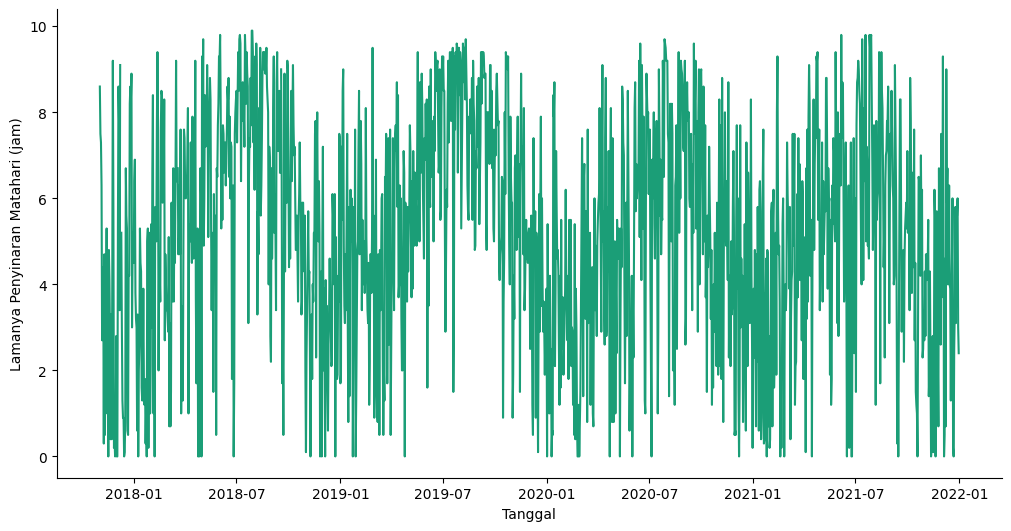

In [ ]:
#Plot Dataset
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['Lamanya Penyinaran Matahari (jam)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('Lamanya Penyinaran Matahari (jam)')

In [ ]:
#Interpolation
df['Lamanya Penyinaran Matahari (jam)'].interpolate(method='spline', order=2, inplace=True)

Mengisi data yang bersifat null dengan metode interpolation. Interpolation sendiri merupakan sebuah teknik yang digunakan pada data time series untuk mengisi suatu nilai kosong atau null dengan melihat data sebelum dan sesudahnya. Kami menggunakan interpolation bertipe spline karena dataset yang digunakan merupakan dataset bertipe seasonal yang memiliki perubahan yang curam.

In [ ]:
#Show Info Dataset After Interpolation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tanggal                            1522 non-null   datetime64[ns]
 1   Lamanya Penyinaran Matahari (jam)  1522 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


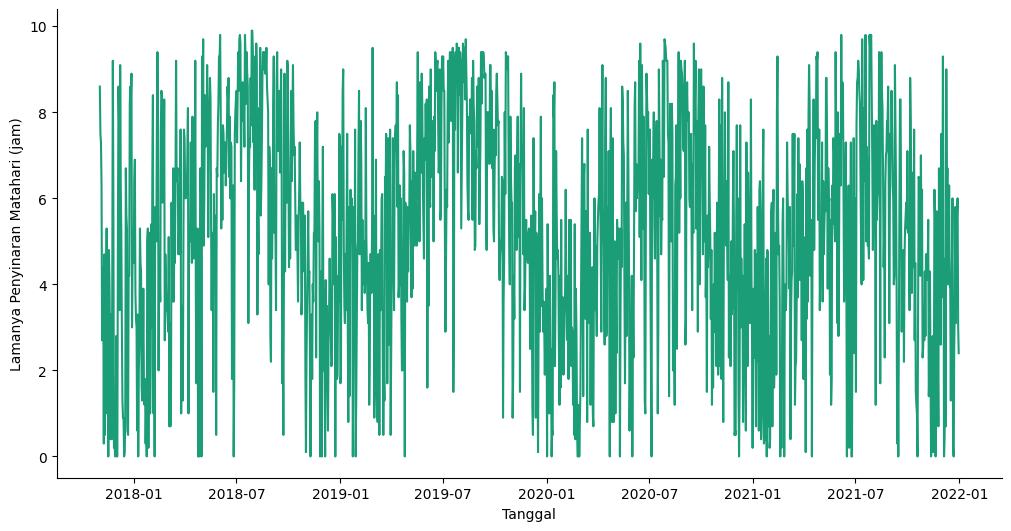

In [ ]:
#Plot Dataset After Interpolation
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['Lamanya Penyinaran Matahari (jam)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('Lamanya Penyinaran Matahari (jam)')

<Figure size 640x480 with 0 Axes>

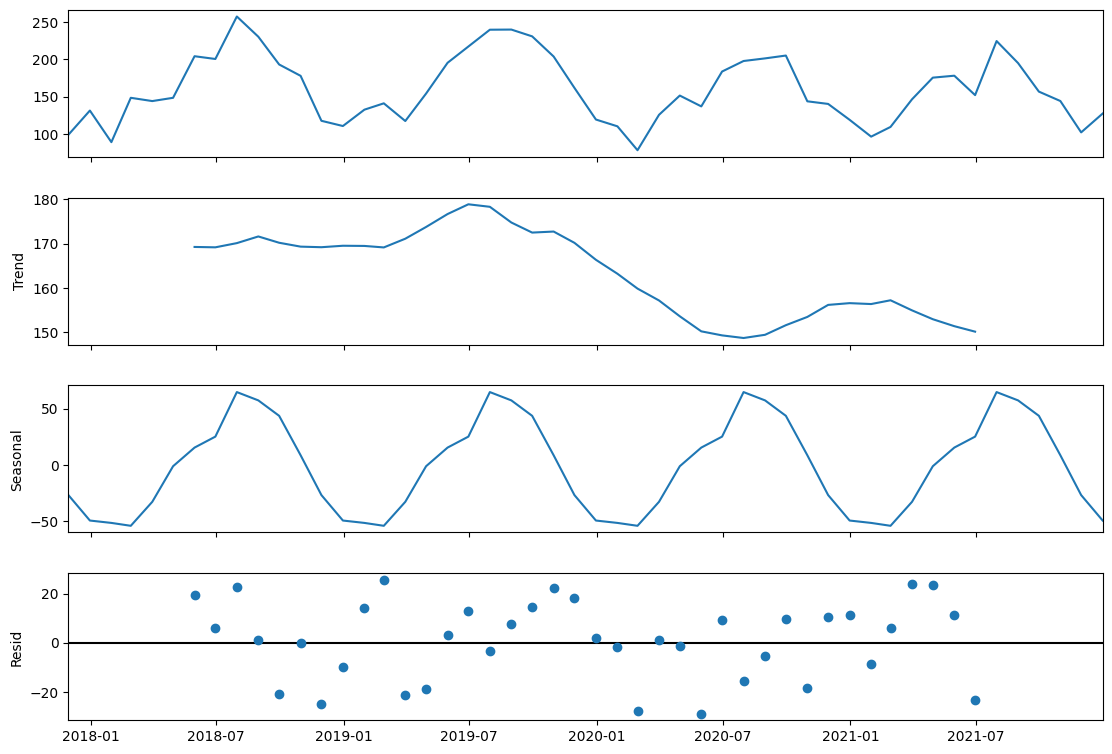

In [ ]:
#Plot Decomposition Dataset
tmp = df.set_index('Tanggal')
decompose  = seasonal_decompose(tmp.resample('M').sum())
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(12,8)
fig.show()

4 plot diatas merupakan plot hasil decompose dari dataset, hasil analisis keempat plot tersebut adalah sebagai berikut:

**1. Plot Observed**

Pada plot ini menunjukkan data time series asli tanpa dimodifikasi. Plot ini menunjukkan bahwa data time series memiliki fluktuasi yang cukup besar. Fluktuasi ini disebabkan oleh berbagai faktor, seperti tren jangka panjang, pola musiman, dan fluktuasi acak.
Berdasarkan analisis terhadap plot pertama, dapat disimpulkan bahwa data time series memiliki tren naik secara umum. Tren naik ini terlihat dari adanya kenaikan data secara umum dari waktu ke waktu. Selain itu, data time series juga memiliki pola musiman yang berulang setiap tahun.

**2. Plot Trend**

Hasil analisis pada plot trend menunjukan data time series dari tahun 2018 sampai tahun 2019 cenderung mengalami tren kenaikan namun, memasuki tahun 2020 data time series fase penurunan secara eksponensial hingga tahun 2021.

**3. Plot Seasonal**

Pada plot ini menunjukkan komponen seasonal dari data time series. Plot ini menunjukkan bahwa data time series memiliki pola musiman yang berulang setiap tahun.

**4. Plot Residu**

Plot residu menunjukkan hubungan antara nilai residu dan waktu. Residu adalah perbedaan antara nilai observasi dan nilai yang diprediksi oleh model.
Dalam plot ini terlihat bahwa nilai residu tampak tersebar secara acak di sekitar garis nol. Hal ini menunjukkan bahwa model yang digunakan untuk mendekomposisi data time series cukup baik.
Namun, ada beberapa hal yang menjadi perhatian kami dalam analisis plot residu ini, yaitu:
- Ada beberapa titik yang memiliki nilai residu yang cukup besar. Titik-titik ini dapat menunjukkan adanya masalah dengan model yang digunakan, atau dapat menunjukkan adanya faktor-faktor yang tidak dapat dijelaskan oleh model.

In [ ]:
#ADF
adf = adfuller(df['Lamanya Penyinaran Matahari (jam)'], maxlag = 0)

In [ ]:
#ADF Test Result
print('Statistic Test:',adf[0])
print('P-Values:',adf[1])
#Critical Values
print('Critical Values:')
adf[4]

Statistic Test: -22.692356031993832
P-Values: 0.0
Critical Values:


{'1%': -3.434656620970318,
 '5%': -2.863442104538126,
 '10%': -2.5677826540508275}

Berdasarkan test kestasioneran ADF menunjukan bahwa hasil **test statistik lebih kecil daripada critical values** dan **p-value juga lebih kecil dari 0.05**. Dapat disimpulkan bahwa dataset yang kita miliki merupakan **stasioner**

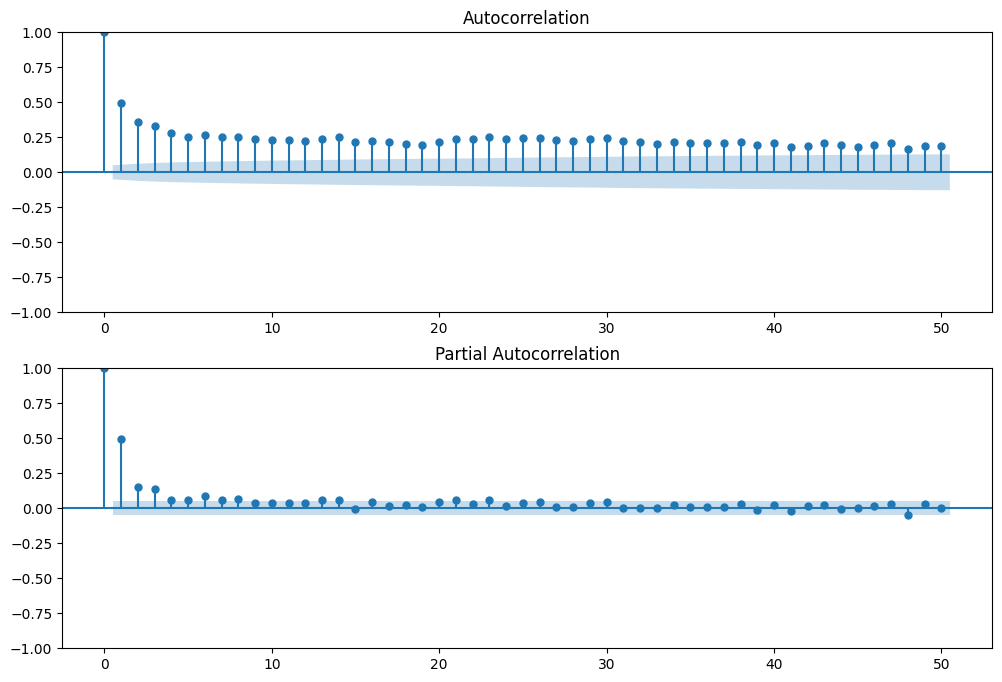

In [ ]:
#Plot ACF & PACF
fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
plot_acf(df['Lamanya Penyinaran Matahari (jam)'],lags=50, ax = ax1)
plot_pacf(df['Lamanya Penyinaran Matahari (jam)'],lags=50, ax = ax2)
plt.show()

Berdasarkan plot ACF bisa dilihat bahwa yt masih berkorelasi dengan kuat hingga lag ke-50 bahkan lebih dengan ditunjukannya plot belum terpotong pada lag ke-50. Dikarenakan lamanya waktu running yang diperlukan untuk nilai lag yang lebih tinggi maka untuk orde dari MA hanya akan di test untuk **1, 25, dan 50**.

Berdasarkan plot PACF bisa dilihat bahwa $Y_t$ masih berkorelasi kuat dengan lag ke **1, 2, 3, 5, dan 7**. Maka akan ditest untuk orde dari AR pada 5 lag tersebut.

In [ ]:
#ARMA Model Fitting
ar_orders = [1,2,3,5,7]
ma_orders = [1,25,50]
fitted_model_dict = {}
for i in range(len(ar_orders)):
  for j in range(len(ma_orders)):
    arma_model = ARIMA(df['Lamanya Penyinaran Matahari (jam)'], order = (ar_orders[i],0,ma_orders[j]))
    arma_model_fit = arma_model.fit()
    fitted_model_dict[(ar_orders[i],ma_orders[j])] = arma_model_fit

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stat

In [ ]:
#AIC Result
for i in ar_orders:
  for j in ma_orders:
    print("AIC for 'AR(%s)MA(%s): %s"%(i, j,fitted_model_dict[(i, j)].aic))

AIC for 'AR(1)MA(1): 6728.447286559015
AIC for 'AR(1)MA(25): 6691.32461938716
AIC for 'AR(1)MA(50): 6717.5650475094735
AIC for 'AR(2)MA(1): 6672.054189138216
AIC for 'AR(2)MA(25): 6693.883390360395
AIC for 'AR(2)MA(50): 6719.553537024136
AIC for 'AR(3)MA(1): 6672.694699331241
AIC for 'AR(3)MA(25): 6694.733654231191
AIC for 'AR(3)MA(50): 6717.932584265693
AIC for 'AR(5)MA(1): 6673.142119465088
AIC for 'AR(5)MA(25): 6698.641130061144
AIC for 'AR(5)MA(50): 6723.411939709471
AIC for 'AR(7)MA(1): 6676.185294376094
AIC for 'AR(7)MA(25): 6698.03589512319
AIC for 'AR(7)MA(50): 6745.330818334141


Berdasarkan hasil test AIC pada semua kombinasi p,q dari ARMA(p,q) maka diperoleh ARMA(2,1) sebagai model yang paling optimal karena memiliki nilai AIC yang paling rendah.

Berikut rumus dari model ARMA(2,1) :

$Y_t = 0.5Y_{t-1} + 0.1Y_{t-2} + ɛ_t - 0.5ɛ_{t-1}$

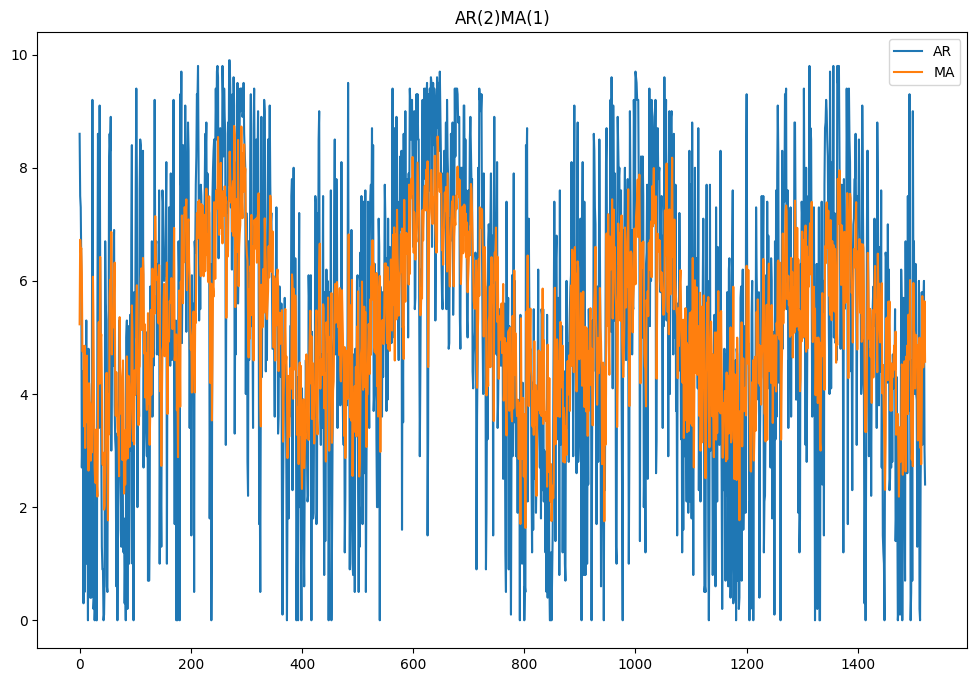

In [ ]:
#Plot The Most Optimum ARMA Model
plt.figure(figsize=(12,8))
plt.plot(df['Lamanya Penyinaran Matahari (jam)'])
plt.plot(arma_model_fit.fittedvalues)
plt.title('AR(2)MA(1)')
plt.legend(['AR','MA'])
plt.show()